In [45]:
import tensorflow as tf
import os

In [46]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [47]:
tf.config.list_physical_devices('GPU')

[]

In [48]:
import cv2
import imghdr

In [49]:
data_dir = 'data' 
image_exts = ['jpeg','jpg', 'png']

In [6]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                #os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 1754 files belonging to 7 classes.


In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
batch = data_iterator.next()

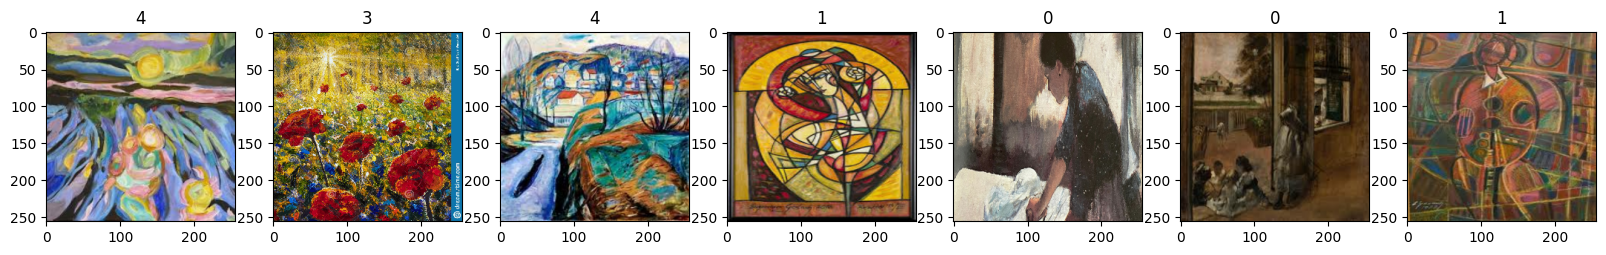

In [18]:
fig, ax = plt.subplots(ncols=7, figsize=(20,20))
for idx, img in enumerate(batch[0][:7]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [19]:
data = data.map(lambda x,y: (x/255, y))

In [20]:
data.as_numpy_iterator().next()

(array([[[[0.16197917, 0.49125308, 0.49129903],
          [0.26343444, 0.5802543 , 0.58472735],
          [0.28970587, 0.5829044 , 0.602742  ],
          ...,
          [0.20045955, 0.42398897, 0.45143995],
          [0.2227022 , 0.4462316 , 0.4736826 ],
          [0.2545343 , 0.47806373, 0.5055147 ]],
 
         [[0.22715035, 0.55642426, 0.5564702 ],
          [0.24262024, 0.5594401 , 0.56391317],
          [0.23836933, 0.5315679 , 0.5514055 ],
          ...,
          [0.20233609, 0.4258655 , 0.45331648],
          [0.2251532 , 0.4486826 , 0.47613358],
          [0.24729626, 0.47082567, 0.49827665]],
 
         [[0.26341528, 0.59268916, 0.5927351 ],
          [0.2365311 , 0.5533509 , 0.557824  ],
          [0.22703546, 0.520234  , 0.5400716 ],
          ...,
          [0.22085057, 0.44438   , 0.47183096],
          [0.24427083, 0.46780026, 0.49525124],
          [0.25624043, 0.47976983, 0.5072208 ]],
 
         ...,
 
         [[0.18036343, 0.41470587, 0.4317421 ],
          [0.17771

In [21]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [22]:
train_size

38

In [23]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [24]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [32]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='softmax'))



In [33]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [35]:
logdir='logs'

In [36]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [37]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10


38/38 [==============================] - 39s 937ms/step - loss: -55502.8281 - accuracy: 0.1143 - val_loss: -414692.9688 - val_accuracy: 0.1136
Epoch 2/10
38/38 [==============================] - 35s 889ms/step - loss: -6730867.0000 - accuracy: 0.1118 - val_loss: -27117164.0000 - val_accuracy: 0.1392
Epoch 3/10
38/38 [==============================] - 35s 877ms/step - loss: -153232592.0000 - accuracy: 0.1094 - val_loss: -423199264.0000 - val_accuracy: 0.0966
Epoch 4/10
38/38 [==============================] - 37s 937ms/step - loss: -1321241344.0000 - accuracy: 0.1069 - val_loss: -2683953152.0000 - val_accuracy: 0.1222
Epoch 5/10
38/38 [==============================] - 36s 906ms/step - loss: -6383190016.0000 - accuracy: 0.1069 - val_loss: -10840442880.0000 - val_accuracy: 0.1222
Epoch 6/10
38/38 [==============================] - 35s 894ms/step - loss: -21094471680.0000 - accuracy: 0.1135 - val_loss: -33465180160.0000 - val_accuracy: 0.1335
Epoch 7/10
38/38 [============================

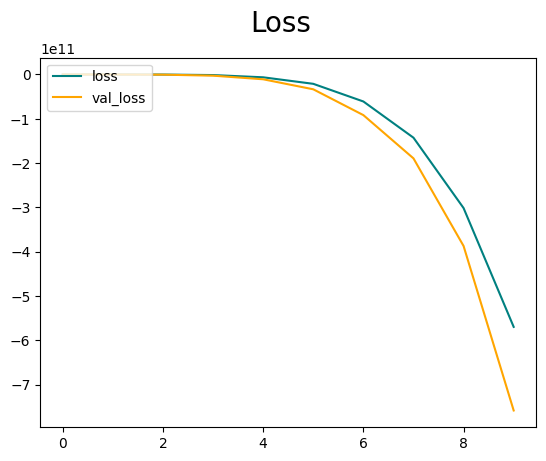

In [38]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

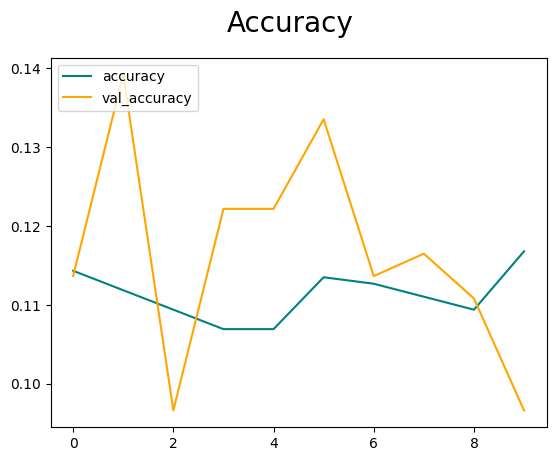

In [39]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [40]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [41]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [42]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 180ms/step


In [43]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.7875, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.15, shape=(), dtype=float32)


In [44]:
learner = cnn_learner(learn, models.resnet50, metrics=[error_rate])

NameError: name 'cnn_learner' is not defined